In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cross_validation as CV
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.feature_extraction import DictVectorizer as DV
from datetime import date

%matplotlib inline

In [3]:
data = pd.read_csv('train.csv',index_col='Id')
features = data.drop('SalePrice',axis = 1)
price = data.SalePrice

## Define functions

In [3]:
def myScore(y, y_pred):
    yLog = np.log(y);
    ind = np.isinf(yLog);
    yLog[ind == True] = 0;    
    
    y_predLog = np.log(y_pred);
    ind = np.isinf(y_predLog);
    y_predLog[ind == True] = 0;
    
    summ = np.sum(np.power(yLog-y_predLog,2))     
    return np.sqrt(summ/y.shape[0])

# replace qualitative estimation to number
def replaceQualVal(dataSet,fNameList):
    # dictionary of values
    vocab = {
        'Ex': 5, 'EX': 5, # excellent    
        'Gd': 4, 'GD': 4, # good
        'TA': 3, 'Ta': 3, # normal
        'FA': 2, 'Fa': 2, # fair
        'PO': 1, 'Po': 1  # 
        }
    
    for fName in fNameList:
        
        # replace stings to numbers
        for word in vocab:
            searchDict = {fName:[word]};
            X = dataSet.isin(searchDict);
            dataSet.loc[X[fName],fName] = vocab[word];
        
        # convert to numeric type
        dataSet[[fName]] = dataSet[[fName]].apply(pd.to_numeric);
    return dataSet;

# replace YN estimation to number
def replaceYNVal(dataSet,fNameList):
    # dictionary of values
    vocab = {
        'Yes': 1, 'Y': 5, # yes
        'No': 1, 'N': 1  # no
        }
    
    for fName in fNameList:
        
        # replace stings to numbers
        for word in vocab:
            searchDict = {fName:[word]};
            X = dataSet.isin(searchDict);
            dataSet.loc[X[fName],fName] = vocab[word];
        
        # convert to numeric type
        dataSet[[fName]] = dataSet[[fName]].apply(pd.to_numeric);
    return dataSet;

# main fit function
def fitData(folds,regressor,features):
    

In [19]:
trees = GBR(verbose = 1, n_estimators = 5000, max_depth = 3);
trees.loss_ = myScore

# CVS7 = CV.cross_val_score(trees, transFeatures7, price, cv=folds,n_jobs = 8);
X_train, X_test, y_train, y_test = CV.train_test_split(transFeatures, price, test_size=0.33,random_state=43);

trees.fit(X_train,y_train);
res = trees.predict(X_test);

print myScore(y_test, res);

      Iter       Train Loss   Remaining Time 
         1  5373001322.3751            2.71m
         2  4635541823.7376            2.73m
         3  4028399649.5470            2.82m
         4  3524552106.9238            2.83m
         5  3088912792.6158            2.86m
         6  2741597901.2290            2.84m
         7  2420905115.2578            2.87m
         8  2166266518.2333            2.87m
         9  1930571612.3851            2.89m
        10  1745384830.9046            2.90m
        20   756171156.0657            2.96m
        30   456681758.8537            3.04m
        40   341102949.6045            3.03m
        50   280985108.9537            2.99m
        60   244603755.8114            2.97m
        70   222614425.8107            2.90m
        80   202477770.0492            2.88m
        90   183683053.5540            2.86m
       100   171533155.0354            2.83m
       200    97009944.7160            2.58m
       300    60392121.3264            2.47m
       40

## Linear regression

In [20]:
from sklearn import linear_model as LM
clf = LM.Ridge(alpha = 0.7,normalize = True)
clf.fit(X_train,y_train);
y_pr = clf.predict(X_test);
print myScore(y_test, y_pr)*100

14.4240047876


In [21]:
Lasso = LM.Lasso(alpha= 1, normalize=True, max_iter=10000);

folds = CV.KFold(price.size, n_folds=5, random_state = 43);
CVS7 = CV.cross_val_score(Lasso, transFeatures, price, cv=folds,n_jobs = 8);
print CVS7.mean()*100

Lasso.fit(X_train,y_train);
y_pr = Lasso.predict(X_test);
print myScore(y_test, y_pr)*100

81.0411436361
18.8300996174


In [22]:
print Lasso.coef_

[ -1.47191795e+02   3.40888681e+01   2.97275133e-01   6.28965198e+03
   8.79700902e+03   8.89603437e+00   0.00000000e+00   1.19272953e+01
   3.13000560e+03  -5.94831635e+03   5.63210540e+03  -3.05926256e+03
   2.08390501e+01   6.32866870e+00  -0.00000000e+00   1.79091660e+01
   3.86937386e+02   0.00000000e+00   6.50497792e+00  -4.31381642e+01
   5.97685528e+01   3.97045086e+02  -3.64882328e+03   1.98006657e+03
   5.99375556e+03  -7.23578044e+03  -5.22997459e+03   7.03595224e+03
   4.21605203e+03   6.20952402e+03  -1.14716192e+01   4.03259934e+03
   1.43666142e+01   4.60347538e+03  -3.63899295e+03   1.05181292e+01
   3.07291316e+01  -1.69933058e+00   3.61210957e+01   3.74333839e+01
  -0.00000000e+00   1.71652233e+04   4.58789636e-01  -7.09617980e+02
  -5.44881065e+01  -1.08447189e+04  -0.00000000e+00  -8.93927681e+01
   8.56043204e+02  -2.07234367e+03  -0.00000000e+00   3.69046760e+03
   1.14470722e+04  -9.87749444e+03  -8.61346422e+03  -0.00000000e+00
   3.64610546e+03   1.62739100e+04

## Analize date of sold

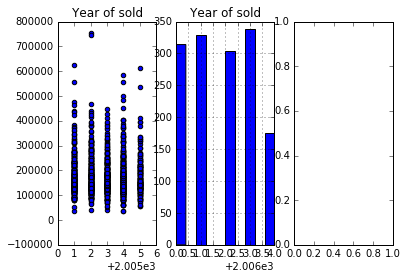

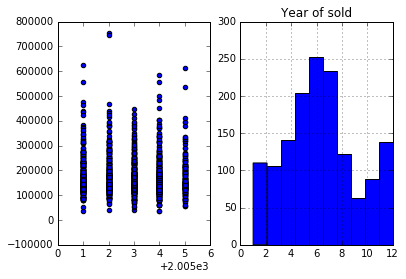

In [79]:
plt.figure();
plt.subplot(131);
plt.scatter(num_features3['YrSold'],price);
plt.title('Year of sold');
plt.subplot(132);
num_features3['YrSold'].hist();
plt.title('Year of sold');
plt.subplot(133);


plt.figure();
plt.subplot(121);
plt.scatter(num_features3['YrSold'],price);
plt.subplot(122);
num_features3['MoSold'].hist();
plt.title('Year of sold');

Похоже, что дата продажи абсолютно не влияет на цену. Попробую исключить эти признаки и обучить модель.

## Analize heating type and quality

GasA 1428
GasW 18
Grav 7
Wall 4
OthW 2
Floor 1


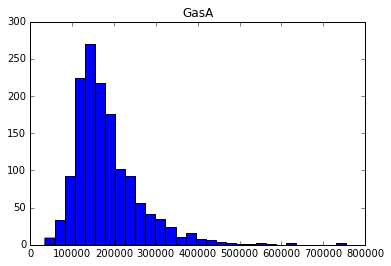

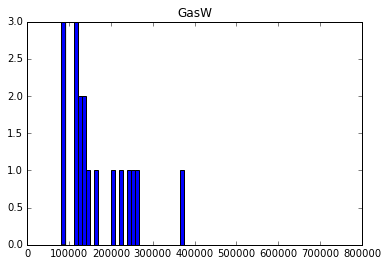

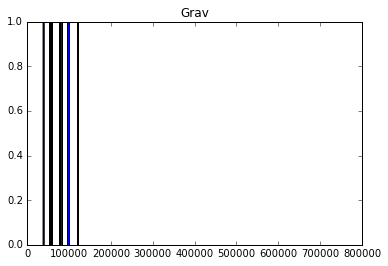

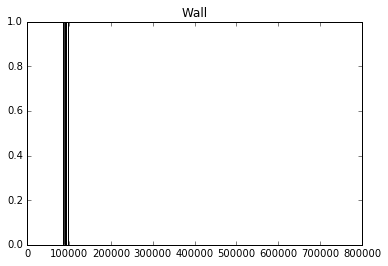

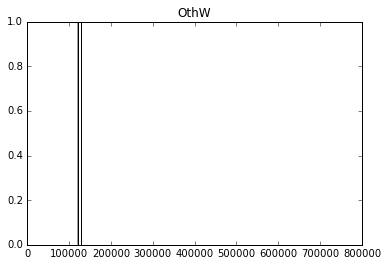

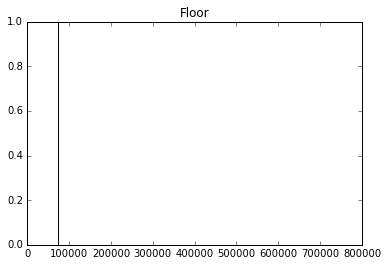

In [35]:
# Heating: Type of heating
# HeatingQC: Heating quality and condition

        
heatTypes = features['Heating'].unique();
for heatType in heatTypes:
    plt.figure()
    slHT = price[features['Heating'].isin([heatType])];
    plt.hist(slHT,bins = 30)
    plt.title(heatType)
    plt.xlim([0, 800000])
    print heatType, slHT.count()
    
#plt.scatter(num_features3['YrSold'],price);  

Колонка "тип отопления" может быть исключена из модели.

Ex 741
Gd 241
TA 428
Fa 49
Po 1


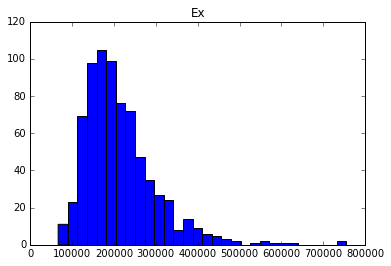

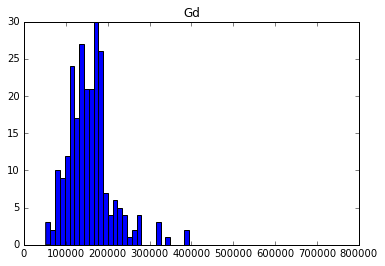

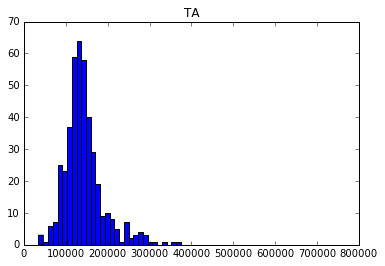

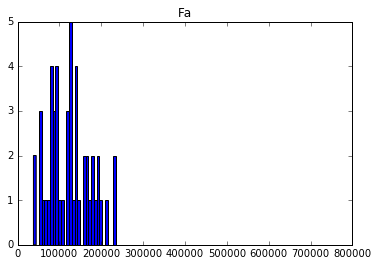

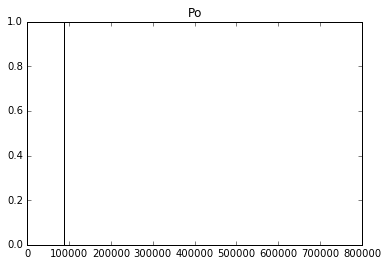

In [97]:
heatQCs = features['HeatingQC'].unique();

for heatQC in heatQCs:
    plt.figure()
    slHQ = price[features['HeatingQC'].isin([heatQC])];
    plt.hist(slHQ,bins = 30)
    plt.title(heatQC)
    plt.xlim([0, 800000])
    print heatQC, slHQ.count()

In [ ]:
# replacement
heatQCs = features['HeatingQC'].unique();

for heatQC in heatQCs:
    plt.figure()
    slHQ = price[features['HeatingQC'].isin([heatQC])];

## Analize kitchen

[1 2 3 0]
['Gd' 'TA' 'Ex' 'Fa']
1 1392
2 65
3 2
0 1


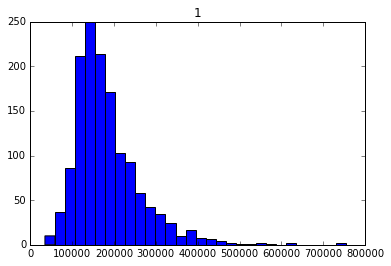

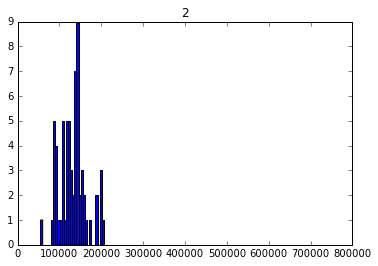

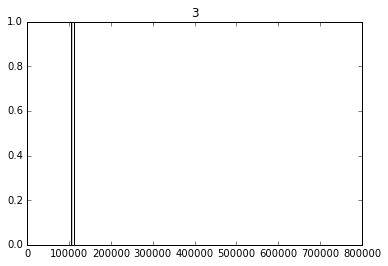

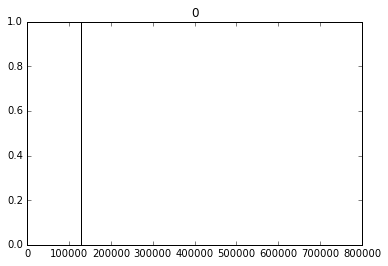

In [94]:
print features['KitchenAbvGr'].unique()
print features['KitchenQual'].unique()

KitchenAbvs = features['KitchenAbvGr'].unique();
for KitchenAbv in KitchenAbvs:
    plt.figure()
    slHT = price[features['KitchenAbvGr'].isin([KitchenAbv])];
    plt.hist(slHT,bins = 30)
    plt.title(KitchenAbv)
    plt.xlim([0, 800000])
    print KitchenAbv, slHT.count()

Количество кухонь влияет на цену

['Gd' 'TA' 'Ex' 'Fa']
Gd 586
TA 735
Ex 100
Fa 39


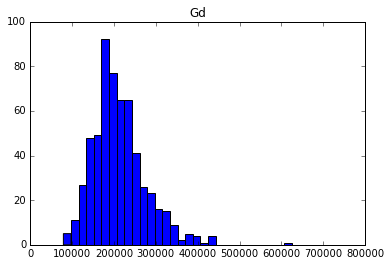

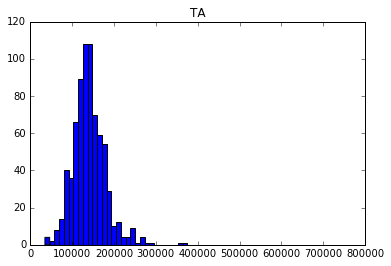

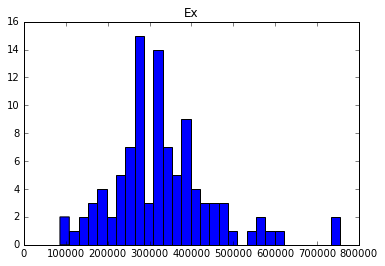

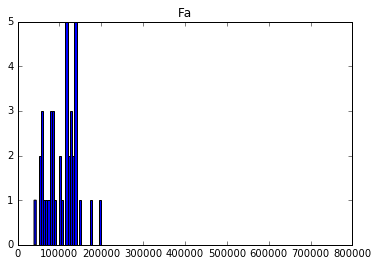

In [95]:
print features['KitchenQual'].unique()

KitchenQS = features['KitchenQual'].unique();
for KitchenQ in KitchenQS:
    plt.figure()
    slHT = price[features['KitchenQual'].isin([KitchenQ])];
    plt.hist(slHT,bins = 30)
    plt.title(KitchenQ)
    plt.xlim([0, 800000])
    print KitchenQ, slHT.count()

## Try to find correlated features

In [62]:
features[num_columns].corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706
